In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Read the CSV file into a DataFrame
train = pd.read_csv(r"C:\Users\user\Downloads\data\train.csv")

In [3]:
# Display the first few rows of the 'train' DataFrame
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Retrieve the data types of the columns in the 'train' DataFrame that are not of the 'object' data type
train.dtypes[train.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

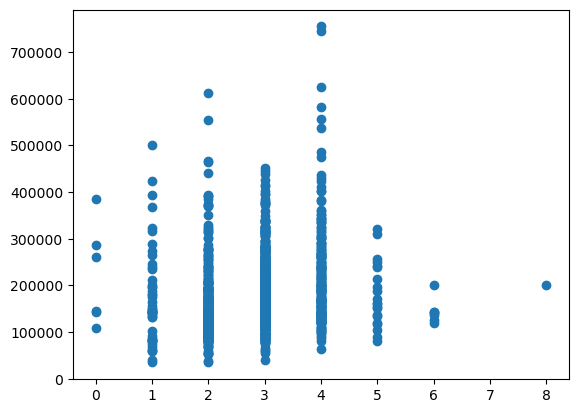

In [5]:
# Create a scatter plot using the 'BedroomAbvGr' column as the x-axis and 'SalePrice' column as the y-axis
plt.scatter(x = 'BedroomAbvGr' , y = 'SalePrice', data = train)

In [6]:
# Filter the 'train' DataFrame to retrieve rows where the 'BedroomAbvGr' column has a value of 8
train.query(' BedroomAbvGr == 8')
#remove tuple withid 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


In [7]:
# Filter the 'train' DataFrame to retrieve rows where the '1stFlrSF' column has a value greater than 4000
filtered_data = train[train['1stFlrSF'] > 4000]
filtered_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


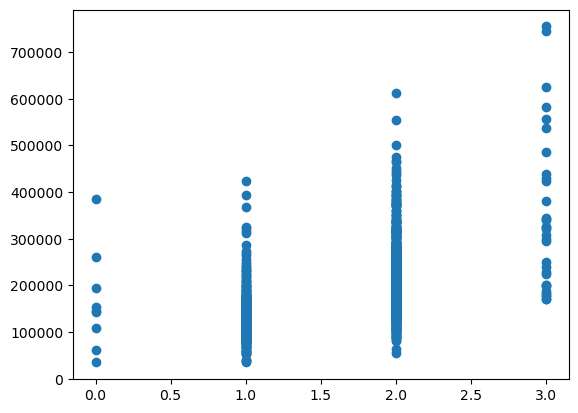

In [8]:
# Create a scatter plot using the 'FullBath' column as the x-axis and 'SalePrice' column as the y-axis
plt.scatter(x = 'FullBath' , y = 'SalePrice', data = train)

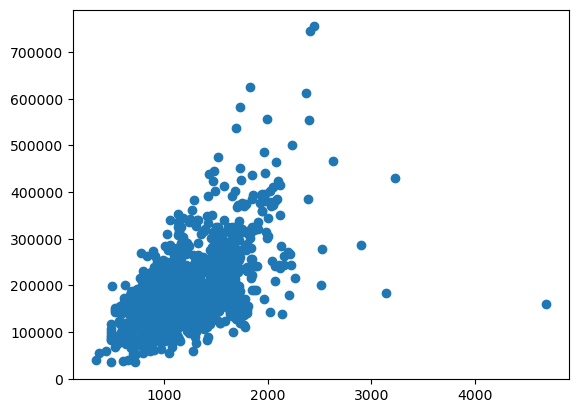

In [9]:
# Create a scatter plot using the '1stFlrSF' column as the x-axis and 'SalePrice' column as the y-axis
plt.scatter(x = '1stFlrSF' , y = 'SalePrice', data = train)

In [10]:
# Create a list of values to exclude from the 'train' DataFrame
values = [636, 1299]

In [11]:
# Filter the 'train' DataFrame to exclude rows where the 'Id' column matches any of the values in the list
train = train[train.Id.isin(values) == False]

In [22]:
# Calculate the count of null values in each column, sort in descending order, and display the top 20 columns
pd.DataFrame(train.isnull().sum().sort_values(ascending = False)).head(20)

,0
PoolQC,1452
MiscFeature,1404
Alley,1368
Fence,1177
FireplaceQu,689
LotFrontage,259
GarageYrBlt,80
GarageCond,80
GarageType,80
GarageFinish,80


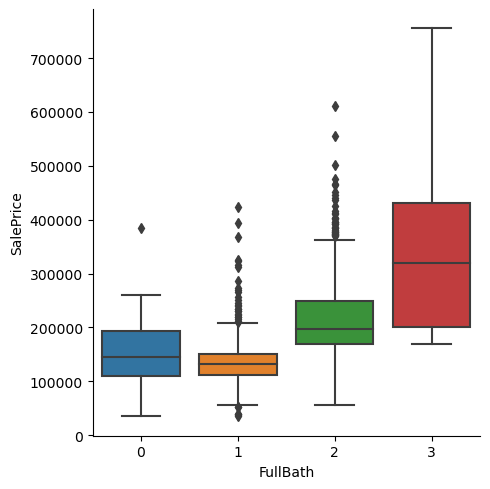

In [25]:
# train['1stFlrSF'].unique()
# Create a categorical plot using seaborn to visualize the relationship between 'FullBath' and 'SalePrice'
sns.catplot(data = train, x = 'FullBath', y = 'SalePrice', kind = 'box')

In [27]:
 # Retrieve the unique values from the 'FullBath' column in the 'train' DataFrame
train['FullBath'].unique()

array([2, 1, 3, 0], dtype=int64)

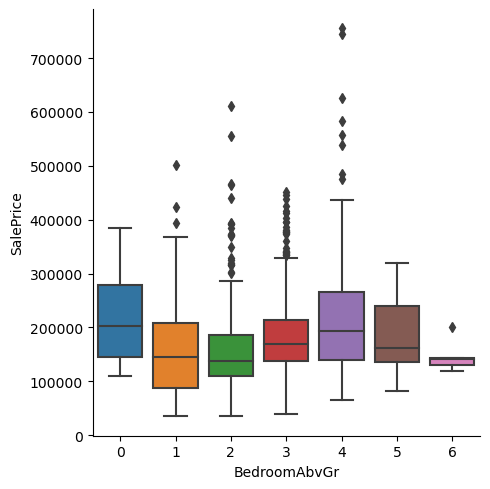

In [26]:
# Create a categorical plot using seaborn to visualize the relationship between 'BedroomAbvGr' and 'SalePrice'
sns.catplot(data = train, x = 'BedroomAbvGr', y = 'SalePrice', kind = 'box')

In [12]:
# Select specific columns from the 'train' DataFrame to create a new DataFrame 'trainx'
trainx = train[['1stFlrSF', 'FullBath', 'BedroomAbvGr']]

# Select the 'SalePrice' column from the 'train' DataFrame to create a new Series 'trainy'
trainy = train["SalePrice"]

<Axes: xlabel='SalePrice', ylabel='Count'>

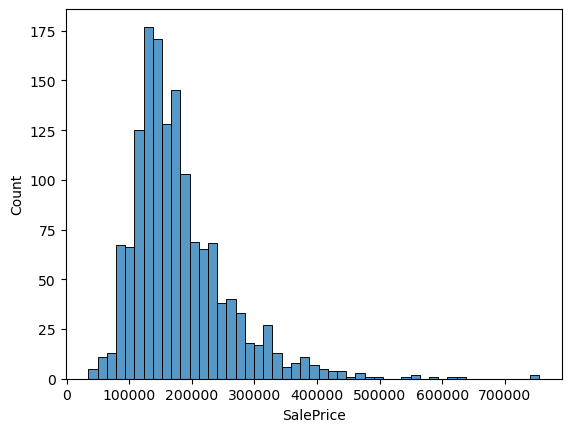

In [30]:
sns.histplot(trainx,x = trainy)

In [13]:
x_train, x_test , y_train, y_test = train_test_split(trainx, trainy, test_size = 0.3, random_state = 40)

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_predict = model.predict(x_test)

In [17]:
mse = mean_squared_error(y_test, y_predict)
mse

2592588955.121725

In [18]:
r2 = r2_score(y_test, y_predict)
r2

0.5025800105736752

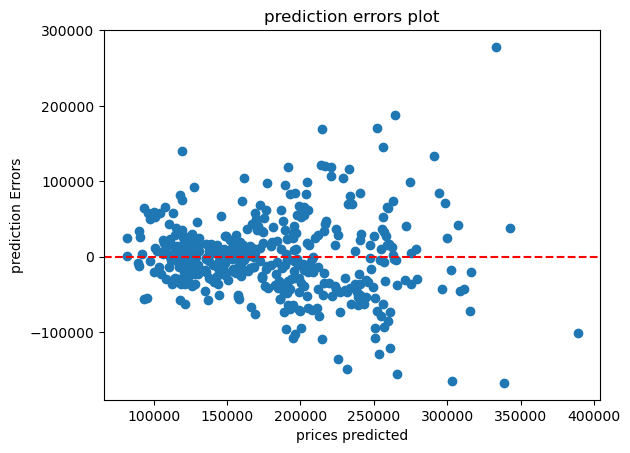

In [19]:
# Calculate the prediction errors by subtracting y_predict from y_test
prediction_errors = y_test - y_predict
plt.scatter( y_predict, prediction_errors)
plt.xlabel("prices predicted")
plt.ylabel('prediction Errors')
plt.axhline( y = 0, color = 'r' ,linestyle = '--')
plt.title('prediction errors plot')
plt.show()

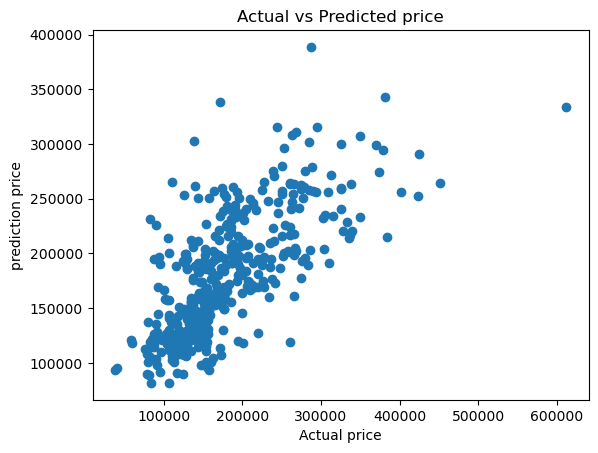

In [20]:
#prediction errors plot access model performance
prediction_errors = y_test - y_predict
plt.scatter(y_test, y_predict)
plt.xlabel("Actual price")
plt.ylabel('prediction price')
plt.title('Actual vs Predicted price')
plt.show()

In [21]:
#display model coefficeints
coefficients = pd.DataFrame({'Features': x_train.columns, 'coefficient':model.coef_})
print(coefficients)

       Features   coefficient
0      1stFlrSF    103.509723
1      FullBath  57229.291895
2  BedroomAbvGr  -3483.953668
